# Introduction To Data Analysis

📒Notebook Created by [@TaninZeraati](https://www.linkedin.com/in/tanin-zeraati-9a2a80196/). Check out the connection step by step  guide [here.](https://github.com/TaninZeraati/DRI-ARC/blob/main/README.md)



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load the Penguins dataset
penguins = sns.load_dataset('penguins')

# Display the first few rows of the dataset
penguins.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


In [8]:
# Summary of the dataset
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [9]:
# Check for missing values
penguins.isnull().sum()


species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [10]:
# Drop rows with missing values
penguins = penguins.dropna()

# Verify missing values are removed
penguins.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

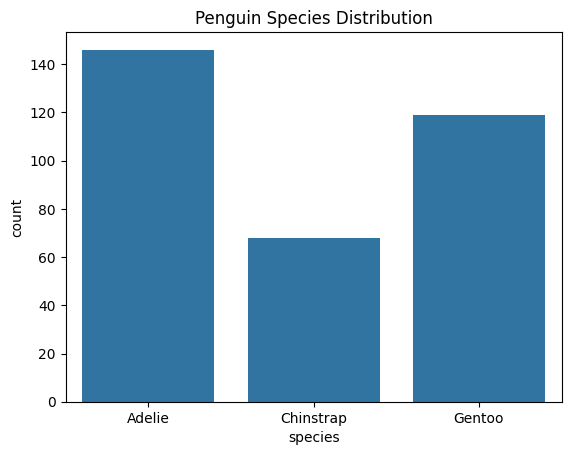

In [11]:
# Count plot of penguin species
sns.countplot(data=penguins, x='species')
plt.title("Penguin Species Distribution")
plt.show()

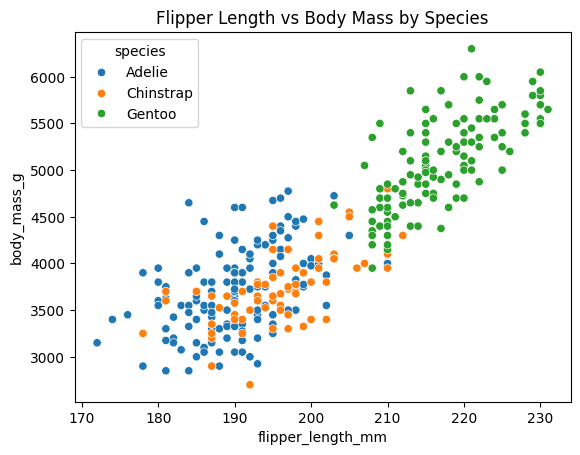

In [12]:
# Scatterplot with species hue
sns.scatterplot(data=penguins, x='flipper_length_mm', y='body_mass_g', hue='species')
plt.title("Flipper Length vs Body Mass by Species")
plt.show()

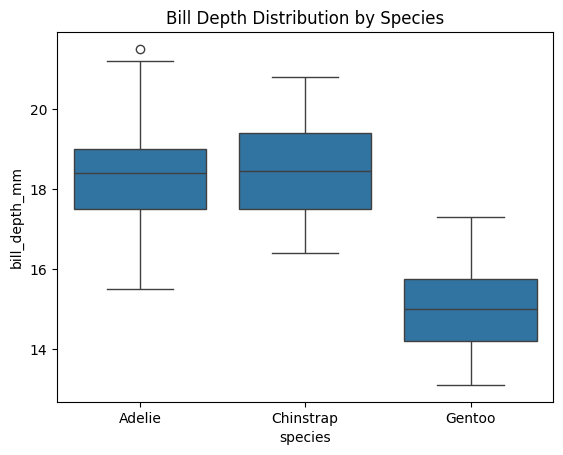

In [13]:
sns.boxplot(data=penguins, x='species', y='bill_depth_mm')
plt.title("Bill Depth Distribution by Species")
plt.show()

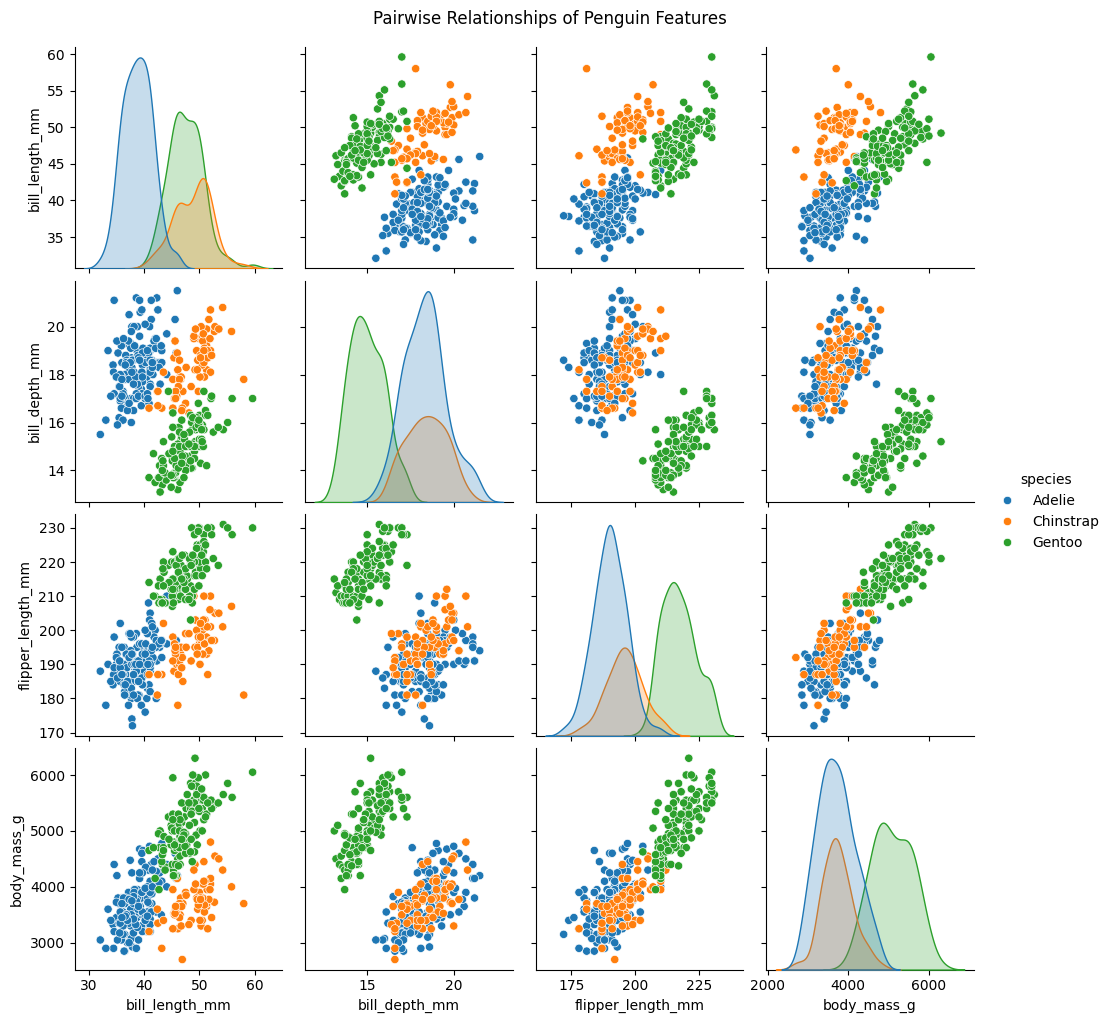

In [14]:
sns.pairplot(penguins, hue='species')
plt.suptitle("Pairwise Relationships of Penguin Features", y=1.02)
plt.show()

In [ ]:
# Compute correlation matrix
corr = penguins.corr()

# Plot heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Penguin Features")
plt.show()

Outliers in 'body_mass_g':
Empty DataFrame
Columns: [species, island, bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, sex]
Index: []


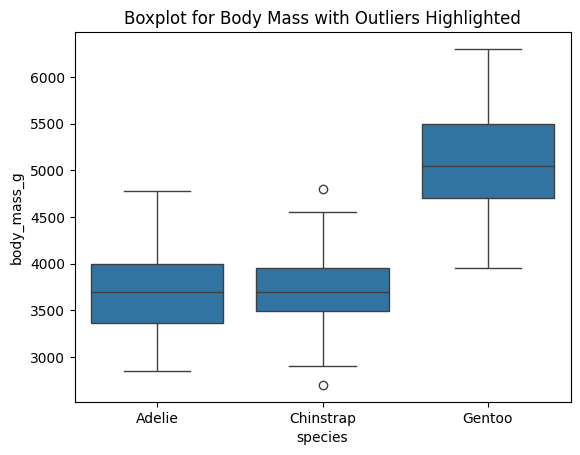

In [17]:
# Detect outliers in the "body_mass_g" column
Q1 = penguins['body_mass_g'].quantile(0.25)  # First quartile
Q3 = penguins['body_mass_g'].quantile(0.75)  # Third quartile
IQR = Q3 - Q1  # Interquartile Range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers (outside of our range)
outliers = penguins[(penguins['body_mass_g'] < lower_bound) | (penguins['body_mass_g'] > upper_bound)]
print(f"Outliers in 'body_mass_g':\n{outliers}")

# Visualize outliers with a boxplot
sns.boxplot(data=penguins, x='species', y='body_mass_g')
plt.title("Boxplot for Body Mass with Outliers Highlighted")
plt.show()